In [49]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('BlackFriday.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
#Basic information of data set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [6]:
del df['Product_Category_2']
del df['Product_Category_3']

In [7]:
df['User_ID'].nunique()

5891

In [8]:
df['Product_ID'].nunique()

3623

In [9]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [10]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [11]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [12]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [13]:
df['Marital_Status'].unique()

array([0, 1])

In [14]:
df['Product_Category_1'].nunique()

18

In [15]:
# On an average user is spending on each purchase
df['Purchase'].sum()/len(df['Purchase'])

np.float64(9333.859852635065)

In [16]:
for column in df.columns:
    print(column,':',df[column].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 17959


In [17]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## Analyzing Gender

In [18]:
## Approach 1

In [19]:
len(df[df['Gender']=='M']),len(df[df['Gender']=='F'])

(405380, 132197)

In [20]:
data=pd.DataFrame({'Ratio':[len(df[df['Gender']=='M']),len(df[df['Gender']=='F'])]},index=['Male','Female'])

<Axes: ylabel='Ratio'>

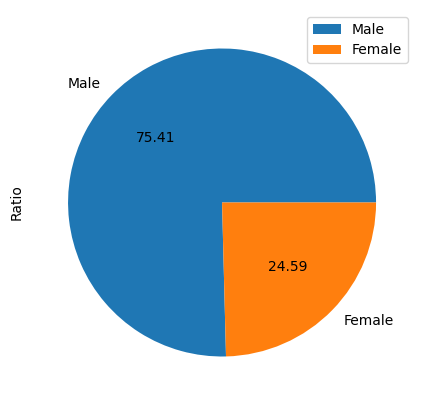

In [21]:
data.plot.pie(y='Ratio',figsize=(5,5),autopct='%.2f')


In [22]:
## Approach @

<Axes: title={'center': 'Gender Ratio'}>

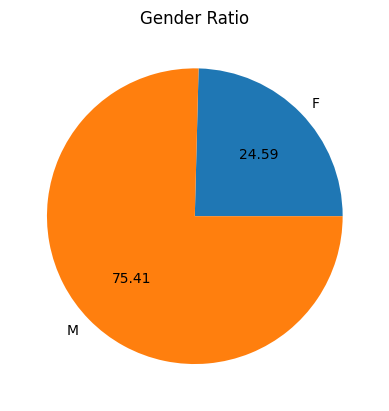

In [23]:
df.groupby('Gender').size().plot(kind='pie',autopct='%.2f',title='Gender Ratio')

In [24]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [25]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


In [26]:
df['Gender'] = df['Gender'].astype('category')
df['Purchase'] = df['Purchase'].astype('float32')


In [27]:
result = df.groupby('Gender')['Purchase'].sum()


C:\Users\Rutuja Navale\AppData\Local\Temp\ipykernel_30620\1221320666.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df.groupby('Gender')['Purchase'].sum()


In [28]:
print(result)


Gender
F    1.164624e+09
M    3.853044e+09
Name: Purchase, dtype: float32


<Axes: title={'center': 'Total Purchases by Gender'}, ylabel='Purchase'>

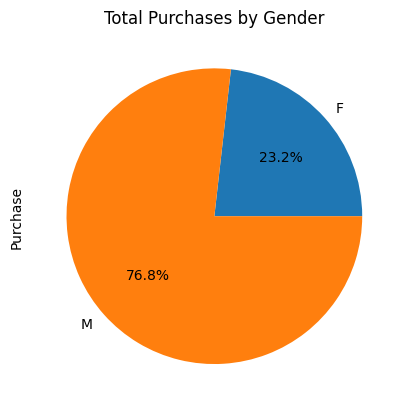

In [29]:
result.plot(kind='pie', autopct="%0.1f%%", title="Total Purchases by Gender")


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     537577 non-null  int64   
 1   Product_ID                  537577 non-null  object  
 2   Gender                      537577 non-null  category
 3   Age                         537577 non-null  object  
 4   Occupation                  537577 non-null  int64   
 5   City_Category               537577 non-null  object  
 6   Stay_In_Current_City_Years  537577 non-null  object  
 7   Marital_Status              537577 non-null  int64   
 8   Product_Category_1          537577 non-null  int64   
 9   Purchase                    537577 non-null  float32 
dtypes: category(1), float32(1), int64(4), object(4)
memory usage: 35.4+ MB


## Age and Marital Status Analysis

<Axes: title={'center': 'Number of Purchase Distribution by Age'}, xlabel='Age'>

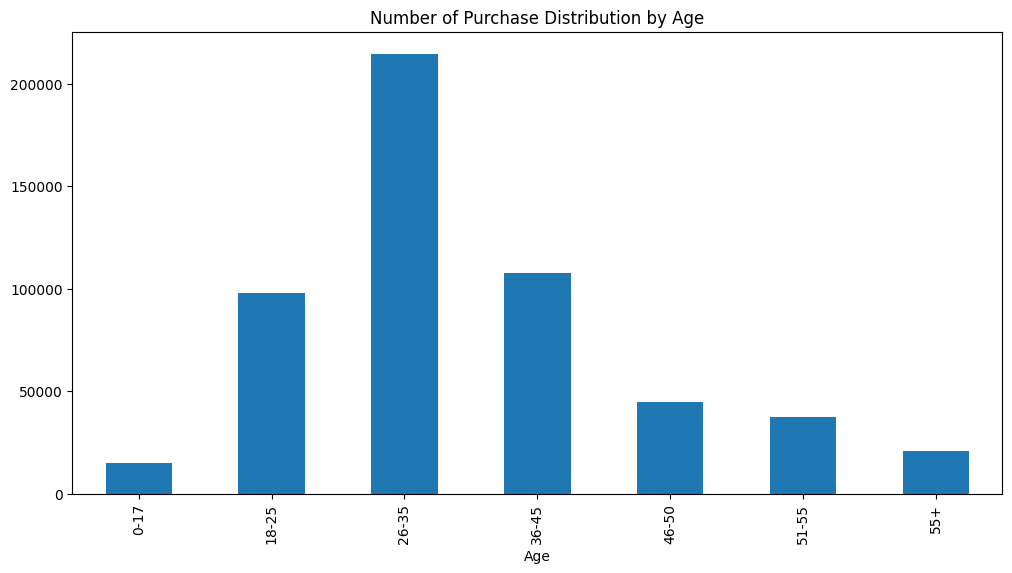

In [31]:
df.groupby('Age').size().plot(kind='bar',figsize=(12,6),title='Number of Purchase Distribution by Age')

In [32]:
lst=[]
for i in df['Age'].unique():
    lst.append([i,df[df['Age']==i]['Product_ID'].nunique()])
# Coverting to dataframe
data=pd.DataFrame(lst,columns=['Age','Products'])
data

,Age,Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


<Axes: xlabel='Age'>

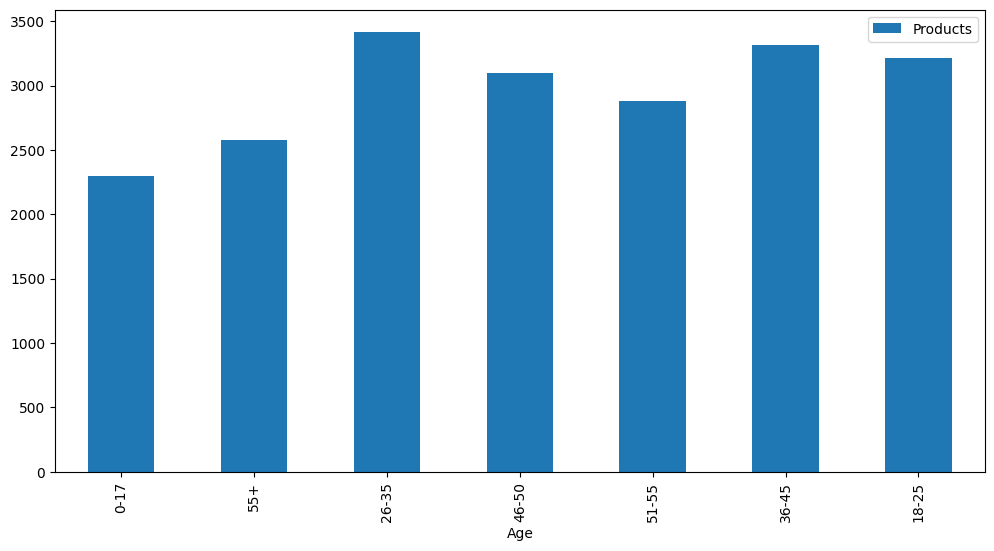

In [33]:
data.plot.bar(x='Age',figsize=(12,6))

In [34]:

df.groupby('Age').sum().plot(kind='bar',figsize=(12,6),title='Number of Purchase Distribution by Age')

TypeError: category type does not support sum operations

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     537577 non-null  int64   
 1   Product_ID                  537577 non-null  object  
 2   Gender                      537577 non-null  category
 3   Age                         537577 non-null  object  
 4   Occupation                  537577 non-null  int64   
 5   City_Category               537577 non-null  object  
 6   Stay_In_Current_City_Years  537577 non-null  object  
 7   Marital_Status              537577 non-null  int64   
 8   Product_Category_1          537577 non-null  int64   
 9   Purchase                    537577 non-null  float32 
dtypes: category(1), float32(1), int64(4), object(4)
memory usage: 35.4+ MB


C:\Users\Rutuja Navale\AppData\Local\Temp\ipykernel_30620\2596645908.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df.groupby('Age')['Purchase'].sum()


<Axes: title={'center': 'Amount spent by age'}, xlabel='Age'>

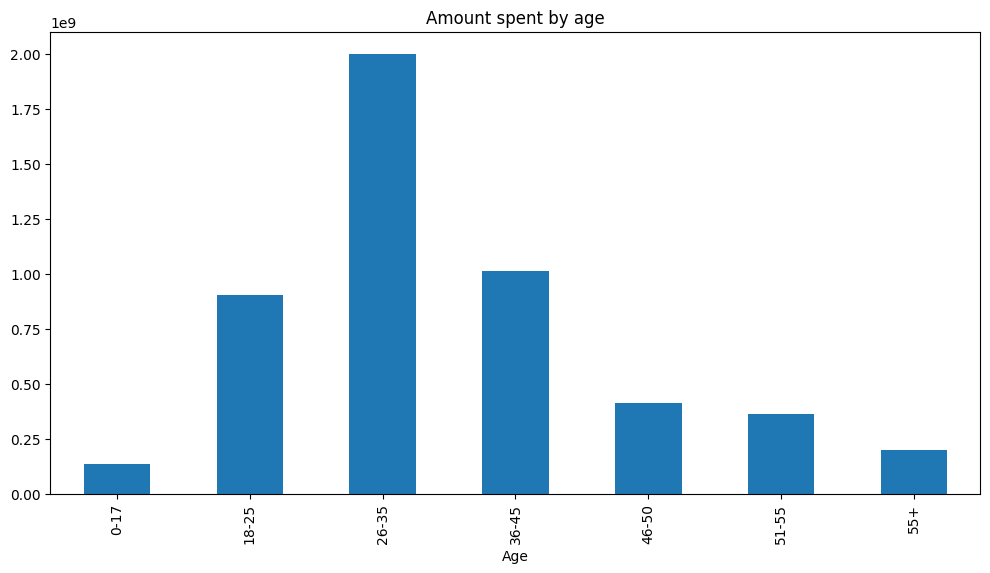

In [37]:
# Ensure 'Age' is a category and 'Purchase' is float32
df['Age'] = df['Age'].astype('category')
df['Purchase'] = df['Purchase'].astype('float32')

# Group by 'Age' and sum the 'Purchase' column, then plot
result = df.groupby('Age')['Purchase'].sum()

# Plotting the result
result.plot(kind='bar', figsize=(12, 6), title='Amount spent by age')


C:\Users\Rutuja Navale\AppData\Local\Temp\ipykernel_30620\3999205817.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df.groupby('Age')['Purchase'].mean()


<Axes: title={'center': 'Average Amount spent by age'}, xlabel='Age'>

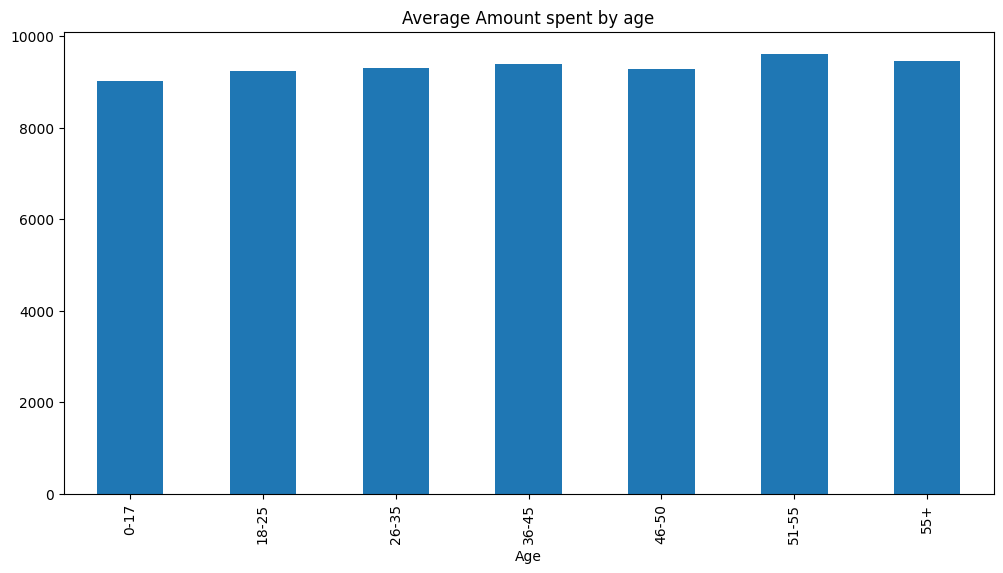

In [38]:



result = df.groupby('Age')['Purchase'].mean()

# Plotting the result
result.plot(kind='bar', figsize=(12, 6), title='Average Amount spent by age')


C:\Users\Rutuja Navale\AppData\Local\Temp\ipykernel_30620\224043344.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df.groupby('Age')['Purchase'].mean()


<Axes: title={'center': 'Average Amount spent by age'}, ylabel='Purchase'>

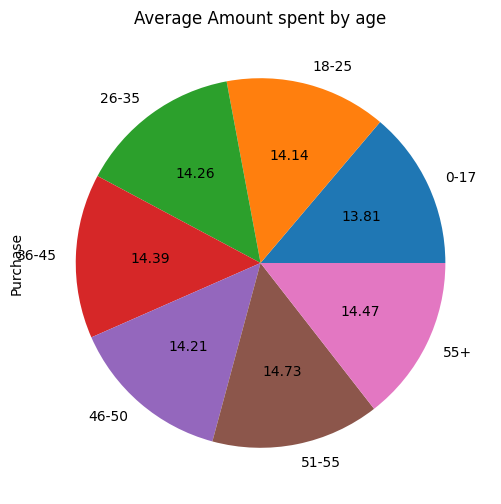

In [42]:
result = df.groupby('Age')['Purchase'].mean()

# Plotting the result
result.plot(kind='pie', figsize=(12, 6), title='Average Amount spent by age',autopct='%.2f')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     537577 non-null  int64   
 1   Product_ID                  537577 non-null  object  
 2   Gender                      537577 non-null  category
 3   Age                         537577 non-null  category
 4   Occupation                  537577 non-null  int64   
 5   City_Category               537577 non-null  object  
 6   Stay_In_Current_City_Years  537577 non-null  object  
 7   Marital_Status              537577 non-null  int64   
 8   Product_Category_1          537577 non-null  int64   
 9   Purchase                    537577 non-null  float32 
dtypes: category(2), float32(1), int64(4), object(3)
memory usage: 31.8+ MB


<Axes: title={'center': 'Marital Status'}>

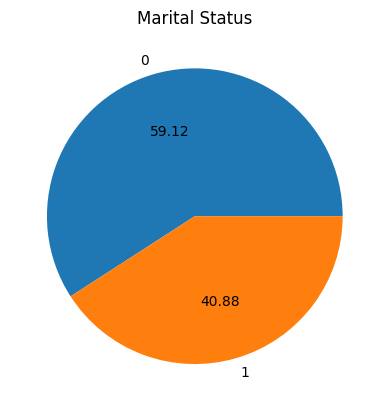

In [46]:
df.groupby('Marital_Status').size().plot(kind='pie',autopct='%.2f',title='Marital Status')

C:\Users\Rutuja Navale\AppData\Local\Temp\ipykernel_30620\949279825.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Gender').size().plot(kind='pie',autopct='%.2f',title='Gender')


<Axes: title={'center': 'Gender'}>

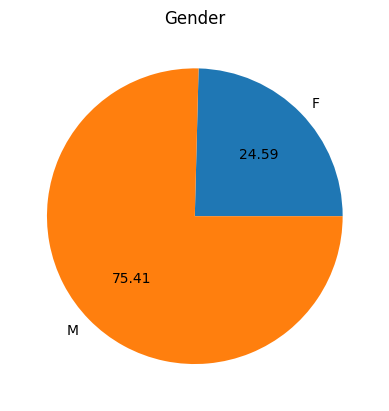

In [48]:
df.groupby('Gender').size().plot(kind='pie',autopct='%.2f',title='Gender')

<Axes: xlabel='Age', ylabel='count'>

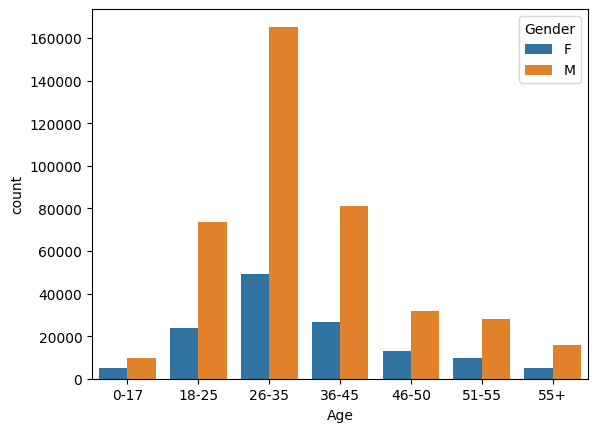

In [50]:
sns.countplot(x='Age',hue='Gender',data=df)

<Axes: xlabel='Gender', ylabel='count'>

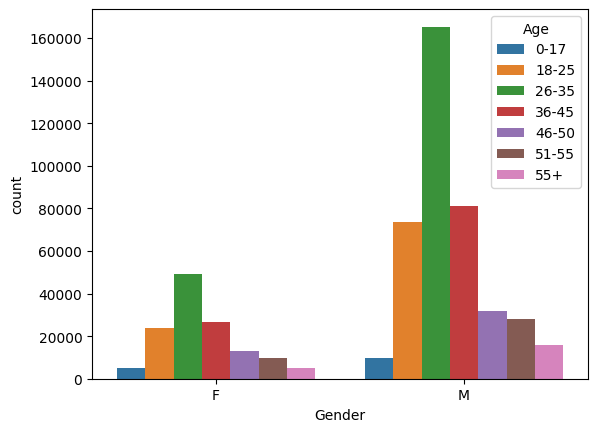

In [51]:
sns.countplot(x='Gender',hue='Age',data=df)

<Axes: xlabel='Gender', ylabel='count'>

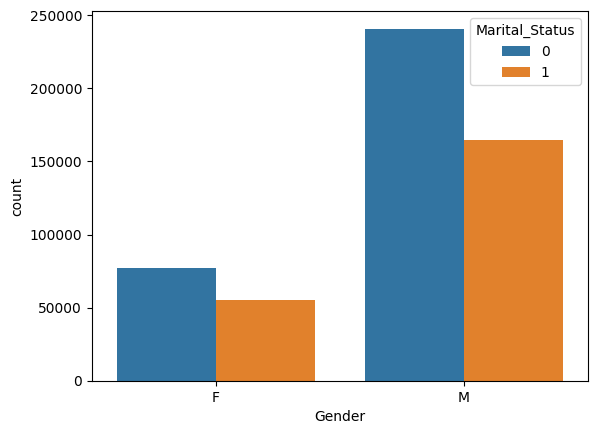

In [52]:
sns.countplot(x='Gender',hue='Marital_Status',data=df)

<Axes: xlabel='City_Category', ylabel='count'>

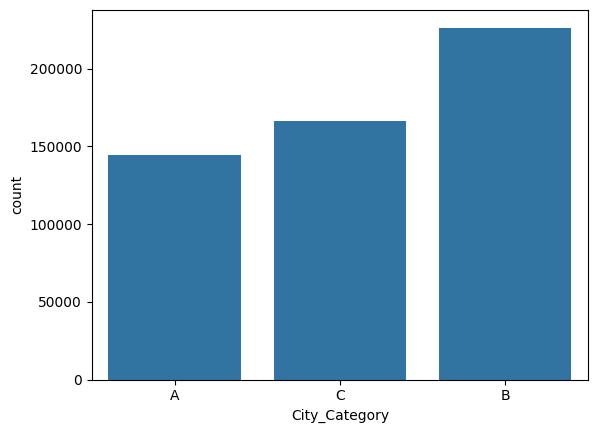

In [53]:
sns.countplot(x=df['City_Category'])

<Axes: >

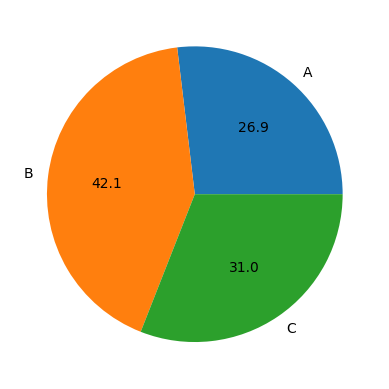

In [55]:
df.groupby('City_Category').size().plot(kind='pie',autopct='%.1f')

<Axes: xlabel='City_Category', ylabel='count'>

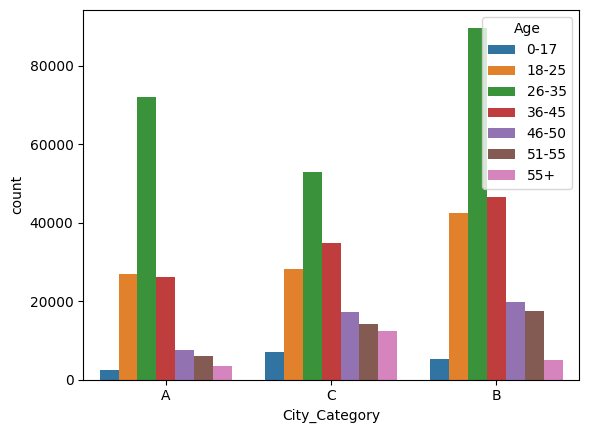

In [56]:
sns.countplot(x='City_Category',hue='Age',data=df)

<Axes: xlabel='City_Category', ylabel='count'>

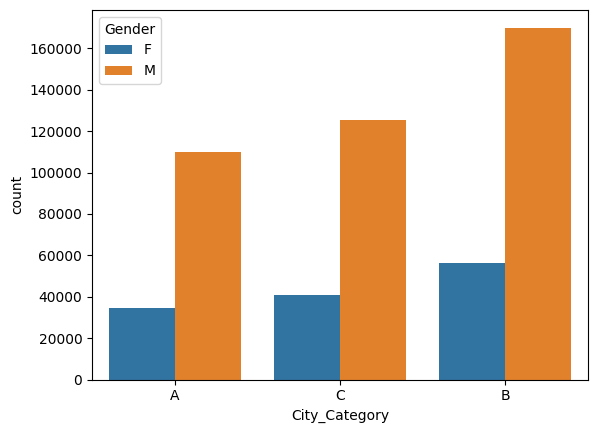

In [59]:
sns.countplot(x='City_Category',hue='Gender',data=df)

C:\Users\Rutuja Navale\AppData\Local\Temp\ipykernel_30620\3826114535.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df.groupby('City_Category')['Purchase'].sum()


<Axes: title={'center': 'city analysis'}, ylabel='Purchase'>

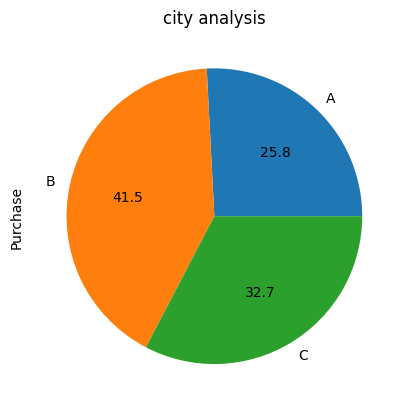

In [62]:

df['City_Category'] = df['City_Category'].astype('category')
result = df.groupby('City_Category')['Purchase'].sum()
result.plot(kind='pie', autopct='%.1f', title='city analysis')


C:\Users\Rutuja Navale\AppData\Local\Temp\ipykernel_30620\2563201441.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df.groupby('City_Category')['Purchase'].mean()


<Axes: title={'center': 'city analysis(average)'}, ylabel='Purchase'>

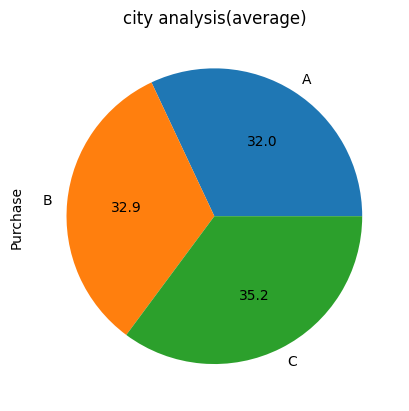

In [63]:
result = df.groupby('City_Category')['Purchase'].mean()
result.plot(kind='pie', autopct='%.1f', title='city analysis(average)')

## Ocupation and Product Analysis

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     537577 non-null  int64   
 1   Product_ID                  537577 non-null  object  
 2   Gender                      537577 non-null  category
 3   Age                         537577 non-null  category
 4   Occupation                  537577 non-null  int64   
 5   City_Category               537577 non-null  category
 6   Stay_In_Current_City_Years  537577 non-null  object  
 7   Marital_Status              537577 non-null  int64   
 8   Product_Category_1          537577 non-null  int64   
 9   Purchase                    537577 non-null  float32 
dtypes: category(3), float32(1), int64(4), object(2)
memory usage: 28.2+ MB


<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

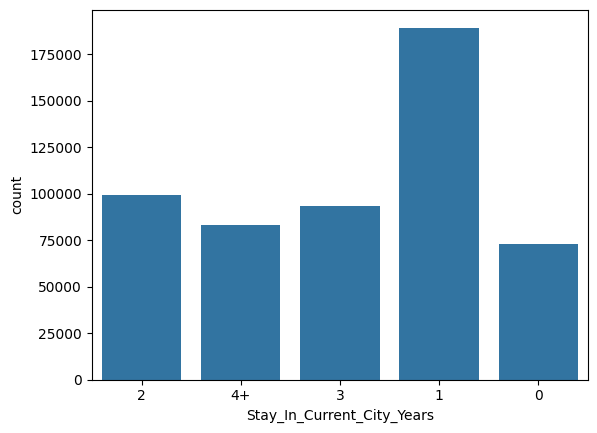

In [65]:
sns.countplot(x=df['Stay_In_Current_City_Years'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

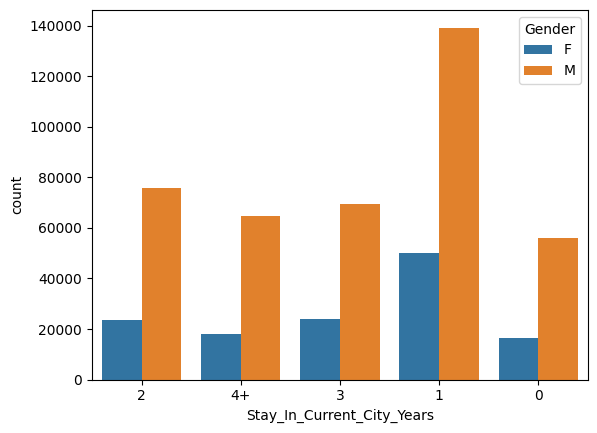

In [66]:
sns.countplot(x='Stay_In_Current_City_Years',hue='Gender',data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

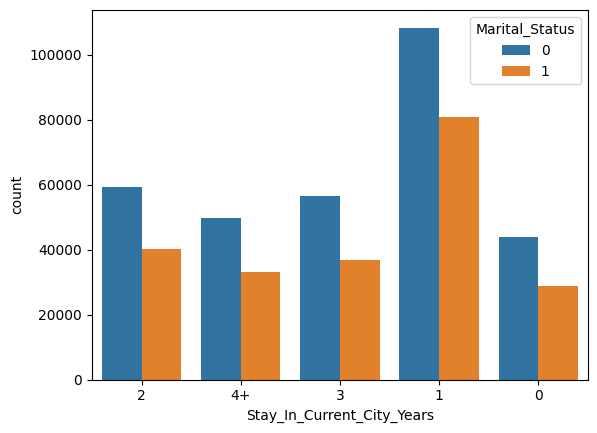

In [67]:
sns.countplot(x='Stay_In_Current_City_Years',hue='Marital_Status',data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

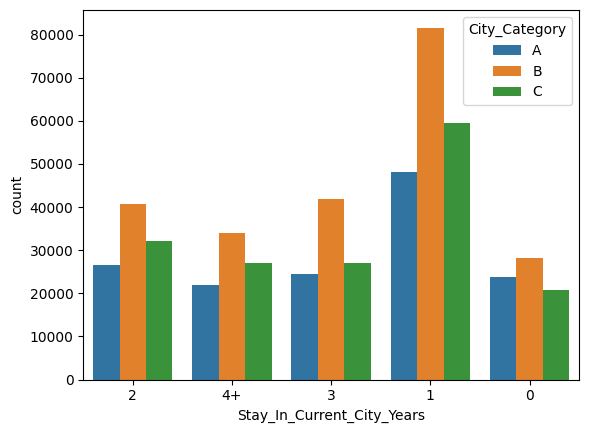

In [68]:
sns.countplot(x='Stay_In_Current_City_Years',hue='City_Category',data=df)

In [69]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969.0


In [70]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype('category')


C:\Users\Rutuja Navale\AppData\Local\Temp\ipykernel_30620\2173758440.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Stay_In_Current_City_Years')['Purchase'].sum().plot(kind='bar')


<Axes: xlabel='Stay_In_Current_City_Years'>

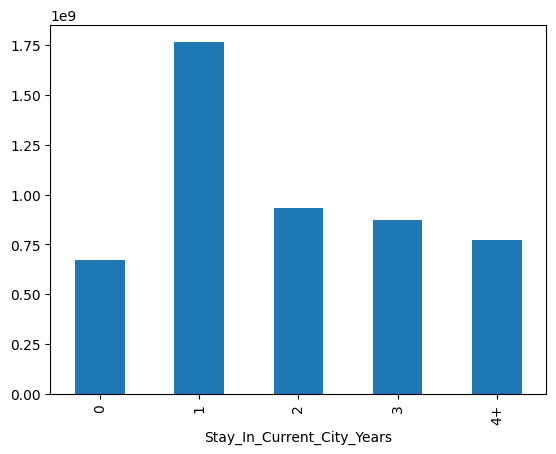

In [73]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].sum().plot(kind='bar')

C:\Users\Rutuja Navale\AppData\Local\Temp\ipykernel_30620\3019460696.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Stay_In_Current_City_Years')['Purchase'].mean().plot(kind='bar')


<Axes: xlabel='Stay_In_Current_City_Years'>

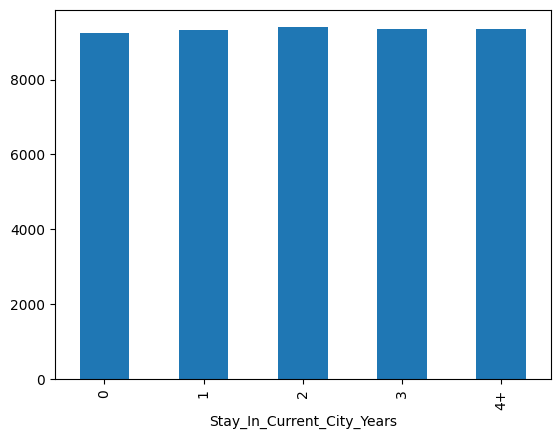

In [74]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].mean().plot(kind='bar')

<Axes: xlabel='Occupation', ylabel='count'>

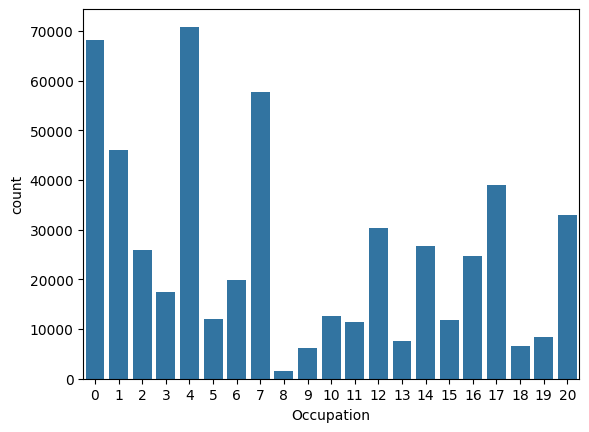

In [75]:
sns.countplot(x=df['Occupation'])

<Axes: title={'center': 'Number of purchases'}, xlabel='Occupation'>

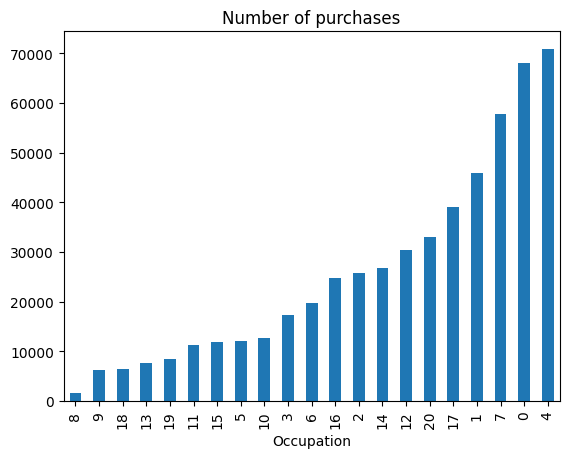

In [82]:
df.groupby('Occupation').size().sort_values().plot(kind='bar',title='Number of purchases')

<Axes: title={'center': 'Amount spent'}, xlabel='Occupation'>

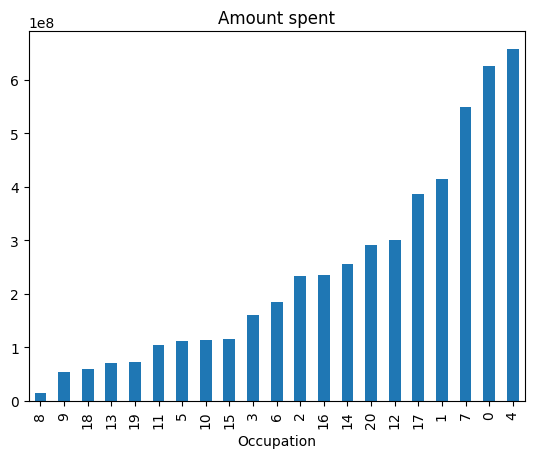

In [83]:
df.groupby('Occupation')['Purchase'].sum().sort_values().plot(kind='bar',title='Amount spent')

<Axes: xlabel='Occupation', ylabel='count'>

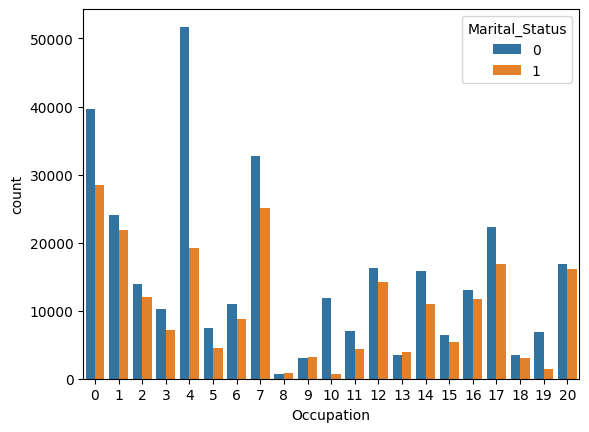

In [84]:
sns.countplot(x='Occupation',hue='Marital_Status',data=df)

<Axes: xlabel='Occupation', ylabel='count'>

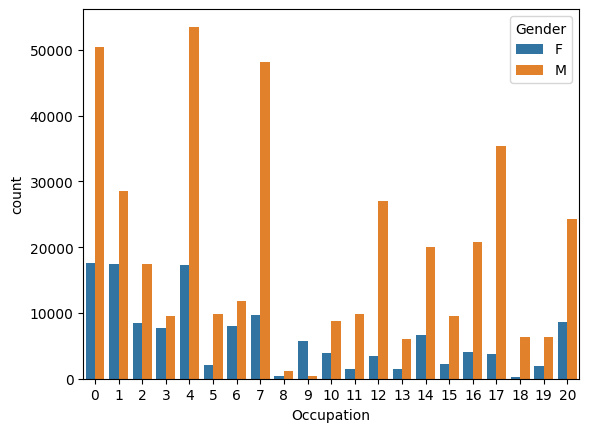

In [86]:
sns.countplot(x='Occupation',hue='Gender',data=df)

<Axes: xlabel='Occupation'>

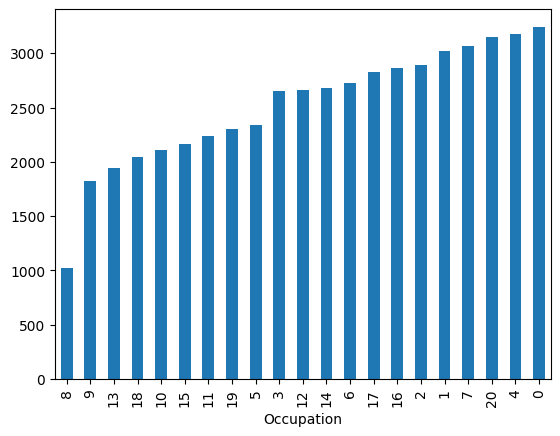

In [88]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind='bar')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     537577 non-null  int64   
 1   Product_ID                  537577 non-null  object  
 2   Gender                      537577 non-null  category
 3   Age                         537577 non-null  category
 4   Occupation                  537577 non-null  int64   
 5   City_Category               537577 non-null  category
 6   Stay_In_Current_City_Years  537577 non-null  category
 7   Marital_Status              537577 non-null  int64   
 8   Product_Category_1          537577 non-null  int64   
 9   Purchase                    537577 non-null  float32 
dtypes: category(4), float32(1), int64(4), object(1)
memory usage: 24.6+ MB


<Axes: xlabel='Product_Category_1'>

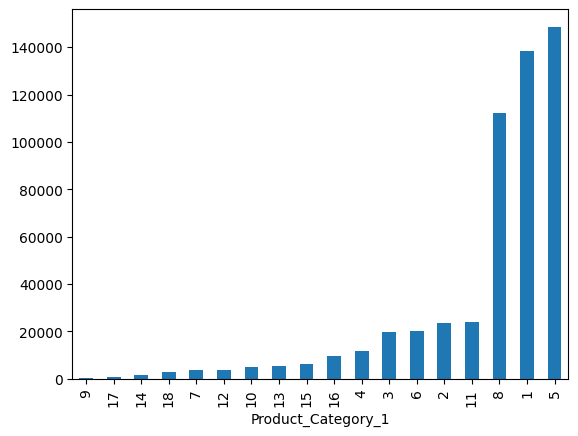

In [94]:
df.groupby('Product_Category_1').size().sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

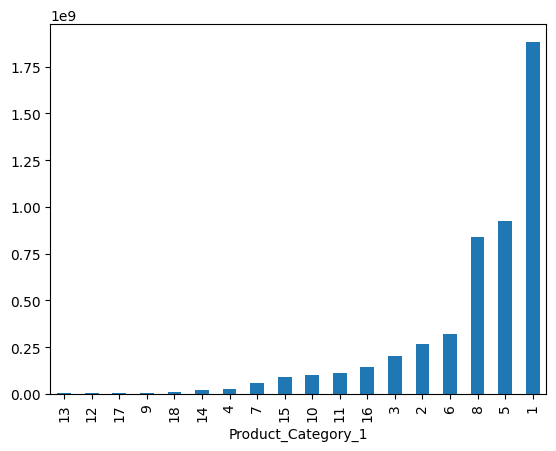

In [96]:
df.groupby('Product_Category_1')['Purchase'].sum().sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

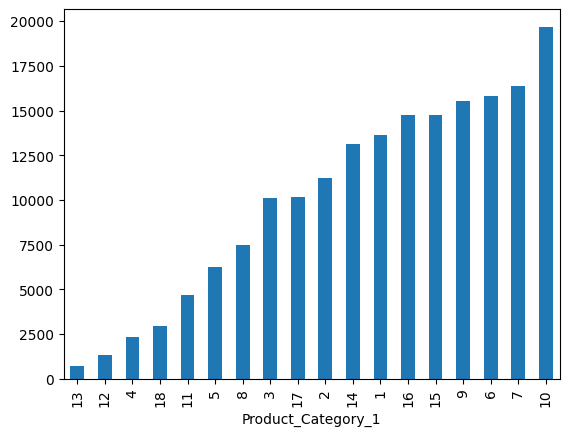

In [97]:
df.groupby('Product_Category_1')['Purchase'].mean().sort_values().plot(kind='bar')

## Combining Gender and Marital Status

In [106]:
lst=[]
for i in range(len(df)):
    lst.append(df['Gender'][i]+'_'+str(df['Marital_Status'][i]))
    
df['MaritalGender']=lst

In [107]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370.0,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200.0,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422.0,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057.0,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969.0,M_0


<Axes: xlabel='MaritalGender', ylabel='count'>

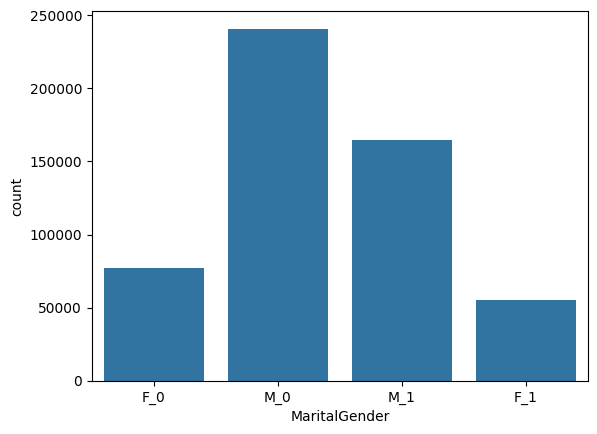

In [108]:
sns.countplot(x=df['MaritalGender'])

<Axes: xlabel='Age', ylabel='count'>

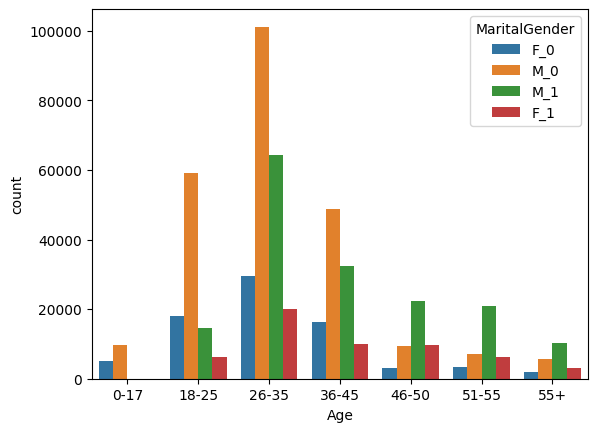

In [110]:
sns.countplot(x=df['Age'],hue=df['MaritalGender'])

<Axes: xlabel='Product_Category_1', ylabel='count'>

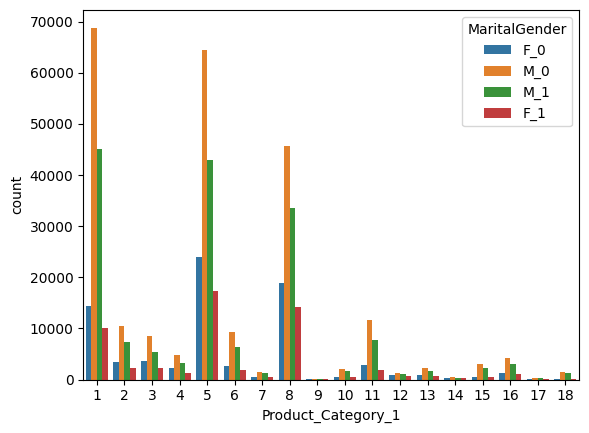

In [111]:
sns.countplot(x=df['Product_Category_1'],hue=df['MaritalGender'])

<Axes: xlabel='City_Category', ylabel='count'>

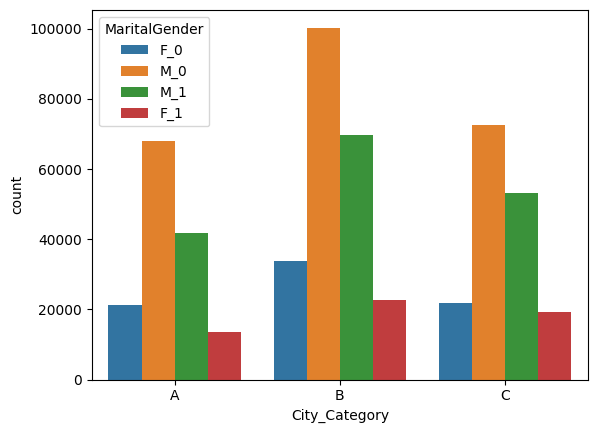

In [112]:
sns.countplot(x=df['City_Category'],hue=df['MaritalGender'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

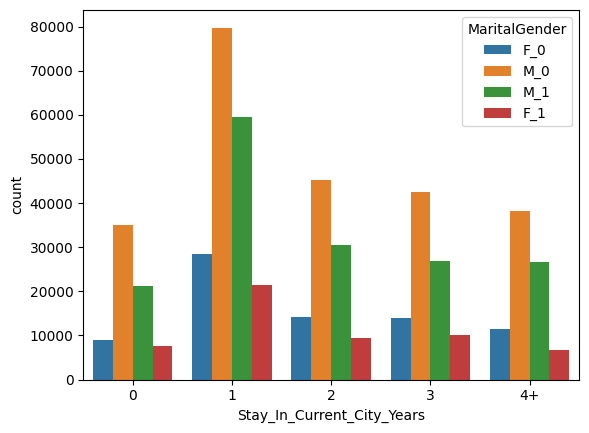

In [113]:
sns.countplot(x=df['Stay_In_Current_City_Years'],hue=df['MaritalGender'])